<a href="https://colab.research.google.com/github/shairatabassum/MachineLearning_python/blob/main/SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Support Vector Machine (SVM) Algorithm**

SVM is a very popular algorithm which uses a linear model to find a **linear decision boundary** or **hyperplane** to separate the data. The choice of the best hyperplane is the one that represents the largest separation in between the two classes. So, the distance from it to the nearest data point on each side is maximized. The hyperplane has to satify the following equation: $w \times x - b = 0$

As the distance has to be maximized on both sides, it follows the equations $w \times x - b = +1$ and $w \times x - b = -1$.

<br>

**Linear Model:**

$w \cdot x - b = 0$

$w \cdot x_i - b \geq 1$  &nbsp; ---> &nbsp; if $y_i = 1$

$w \cdot x_i - b \leq -1$  &nbsp; --->  &nbsp; if $y_i = -1$

which basically means  &nbsp; ---> &nbsp;  $y_i (w \cdot x_i - b) \geq 1$

<br>

**Cost Function:**

Hinge Loss: &nbsp; $l = max(0, 1 - y_i(w \cdot x_i - b))$

<br>

**Add Regularization:**

$J = \lambda ||w||^2 + \frac{1}{n} $$\sum^{n}_{i=1}$$ max(0, 1 - y_i(w \cdot x_i - b))$

if $y_i \cdot f(x) \geq 1:$ &nbsp; $J_i = \lambda ||w||^2$

else: $J_i = \lambda ||w||^2 + 1 - y_i(w \cdot x_i - b)$

<br>

**Gradients:**

if $y_i \cdot f(x) \geq 1:$ &nbsp; $\frac{dJ_i}{dw_k} = 2 \lambda w_k$ &nbsp;&nbsp; and &nbsp;&nbsp; $\frac{dJ_i}{db} = 0$

else: &nbsp; $\frac{dJ_i}{dw_k} = 2 \lambda w_k - y_i \cdot x_i$ &nbsp;&nbsp; and &nbsp;&nbsp; $\frac{dJ_i}{db} = y_i$

<br>

**Update Rule:**

For each training sample $x_i$:

$w = w - \alpha \cdot dw$

$b = b - \alpha \cdot db$


### **Import Dataset**

In [1]:
# import libraries
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
from sklearn.svm import SVC
import sklearn

In [19]:
# load dataset
X, y = datasets.make_blobs(n_samples=100, n_features=2, centers=2, cluster_std=1.05, random_state=40)
y = np.where(y == 0, -1, 1)

# train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

# print data samples
print('X: ', X_train.shape)
print('Sample of X:', X_train[0])
print('y: ', y_train.shape)
print('Sample of y:', y_train[0])

X:  (80, 2)
Sample of X: [ -0.40825547 -10.68054719]
y:  (80,)
Sample of y: -1


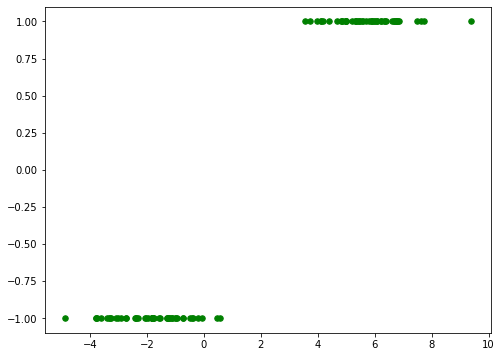

In [22]:
# plot data samples
fig = plt.figure(figsize=(8,6))
plt.scatter(X[:, 0], y, color='g', s=30)
plt.show()

### **SVM from scratch**

In [23]:
class SVM:
    def __init__(self, learning_rate=0.001, lambda_param=0.01, n_iters=1000):
        self.lr = learning_rate
        self.lambda_param = lambda_param
        self.n_iters = n_iters
        self.w = None
        self.b = None

    def fit(self, X, y):
        n_samples, n_features = X.shape

        y_ = np.where(y <= 0, -1, 1)

        self.w = np.zeros(n_features)
        self.b = 0

        for _ in range(self.n_iters):
            for idx, x_i in enumerate(X):
                condition = y_[idx] * (np.dot(x_i, self.w) - self.b) >= 1
                if condition:
                    self.w -= self.lr * (2 * self.lambda_param * self.w)
                else:
                    self.w -= self.lr * (
                        2 * self.lambda_param * self.w - np.dot(x_i, y_[idx])
                    )
                    self.b -= self.lr * y_[idx]

    def predict(self, X):
        approx = np.dot(X, self.w) - self.b
        return np.sign(approx)

In [24]:
# train the model
clf = SVM()
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)

# model accuracy
accuracy = np.sum(y_test == predictions) / len(y_test)
print('Accuracy', accuracy*100, '%')

Accuracy 100.0 %


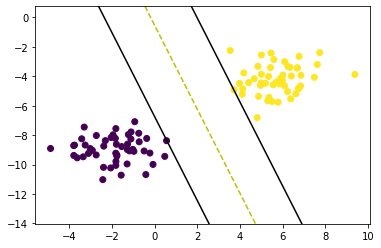

In [25]:
def visualize_svm():
  def get_hyperplane_value(x, w, b, offset):
    return (-w[0] * x + b + offset) / w[1]

  fig = plt.figure()
  ax = fig.add_subplot(1, 1, 1)
  plt.scatter(X[:, 0], X[:, 1], marker="o", c=y)

  x0_1 = np.amin(X[:, 0])
  x0_2 = np.amax(X[:, 0])

  x1_1 = get_hyperplane_value(x0_1, clf.w, clf.b, 0)
  x1_2 = get_hyperplane_value(x0_2, clf.w, clf.b, 0)

  x1_1_m = get_hyperplane_value(x0_1, clf.w, clf.b, -1)
  x1_2_m = get_hyperplane_value(x0_2, clf.w, clf.b, -1)

  x1_1_p = get_hyperplane_value(x0_1, clf.w, clf.b, 1)
  x1_2_p = get_hyperplane_value(x0_2, clf.w, clf.b, 1)

  ax.plot([x0_1, x0_2], [x1_1, x1_2], "y--")
  ax.plot([x0_1, x0_2], [x1_1_m, x1_2_m], "k")
  ax.plot([x0_1, x0_2], [x1_1_p, x1_2_p], "k")

  x1_min = np.amin(X[:, 1])
  x1_max = np.amax(X[:, 1])
  ax.set_ylim([x1_min - 3, x1_max + 3])

  plt.show()

visualize_svm()

In [26]:
# classification report
print(classification_report(y, clf.predict(X)))

              precision    recall  f1-score   support

          -1       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        50

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100



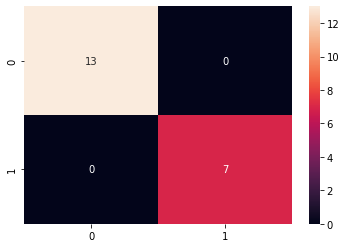

In [27]:
# confusion matrix
sns.heatmap(confusion_matrix(y_test, predictions), annot=True)

### **SVM using scikit-learn**

In [28]:
# train the model
svm = SVC(gamma='auto', kernel='linear')
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)

# model accuracy
accuracy = sklearn.metrics.accuracy_score(y_test, y_pred)
accuracy = accuracy*100
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 100.0 %.


In [29]:
# classification report
print(classification_report(y, svm.predict(X)))

              precision    recall  f1-score   support

          -1       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        50

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100



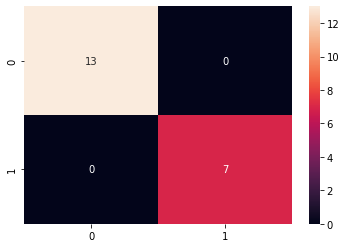

In [30]:
# confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)